#### DFS (Depth-First Search)
- 그래프의 시작 노드에서 출발하여 탐색할 한 쪽 분기를 정하여 최대 깊이까지 탐색을 마친 후 다른 쪽 분기로 이동하여 다시 탐색을 수행하는 알고리즘이다.
- DFS는 깊이 우선 탐색이라고도 부르며 그래프에서 깊은 부분을 우선적으로 탐색하는 알고리즘이다
- DFS는 스택 자료구조(혹은 재귀 함수)를 이용하며, 구체적인 동작 과정은 다음과 같다
    1. 탐색 시작 노드를 스택에 삽입하고 방문 처리를 한다
    2. 스택의 최상단 노드에 방문하지 않은 인접한 노드가 하나라도 있으면 그 노드를 스택에 넣고 방문 처리한다
    <br>방문하지 않은 인접 노드가 없으면 스택에서 최상단 노드를 꺼낸다
    3. 더 이상 2번의 과정을 수행할 수 없을 때까지 반복한다
    <br><br>
    - 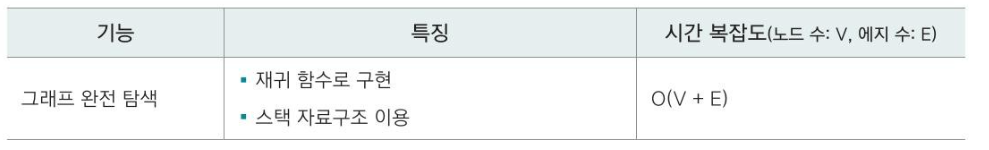

##### DFS 풀이 방법
- DFS는 한 번 방문한 노드를 다시 방문하면 안 되므로 노드 방문 여부를 체크할 리스트가 필요
- 그래프는 인접 리스트로 표현
- 후입선출 특성을 가지므로 스택을 사용

1. 1. DFS를 시작할 노드를 정한 후 사용할 자료구조 초기화하기

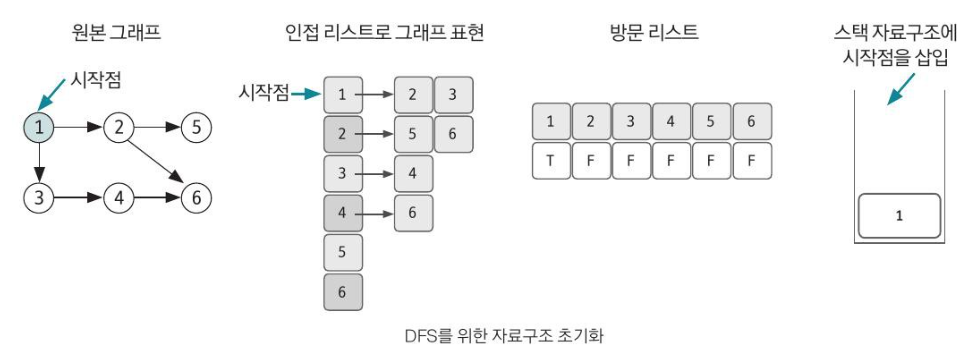

2. 스택에서 노드를 꺼낸 후 꺼낸 노드의 인접 노드를 다시 스택에 삽입하기

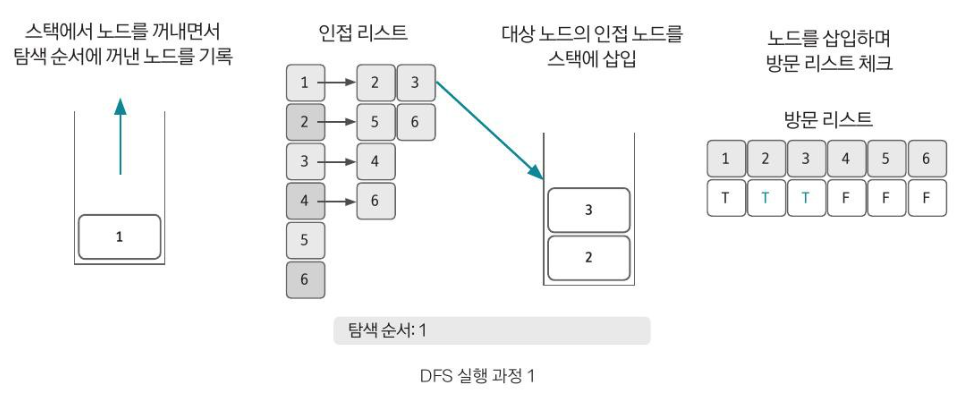

3. 스택 자료구조에 값이 없을 때까지 반복하기

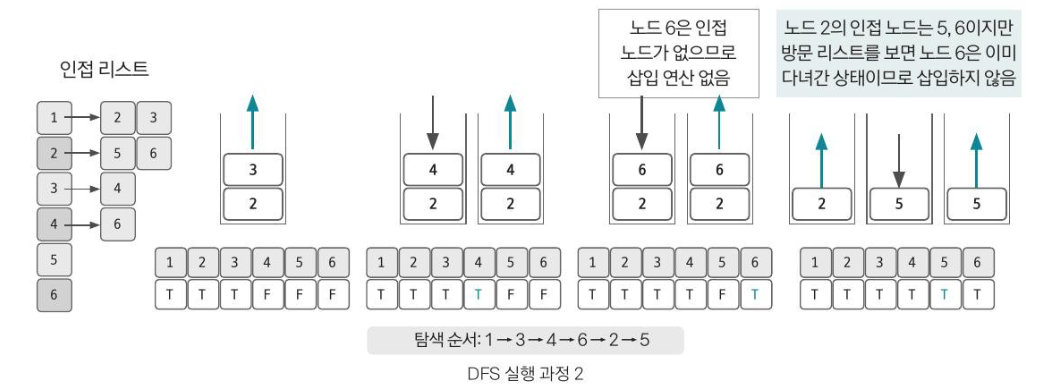

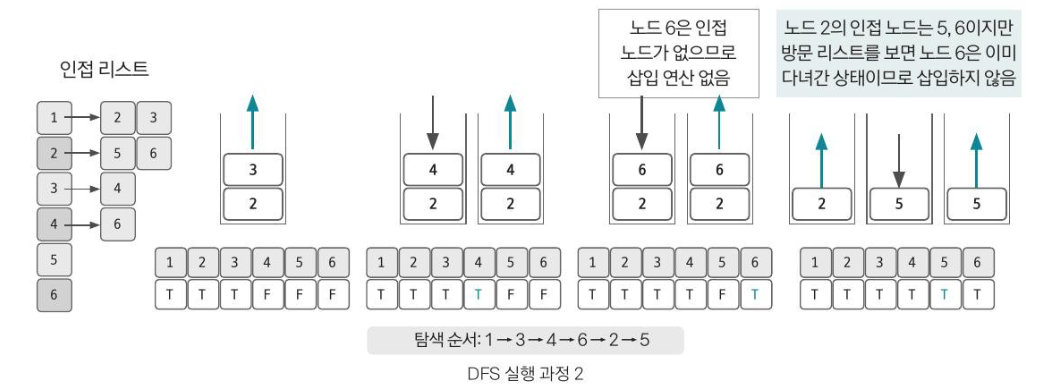

##### DFS 동작 예시

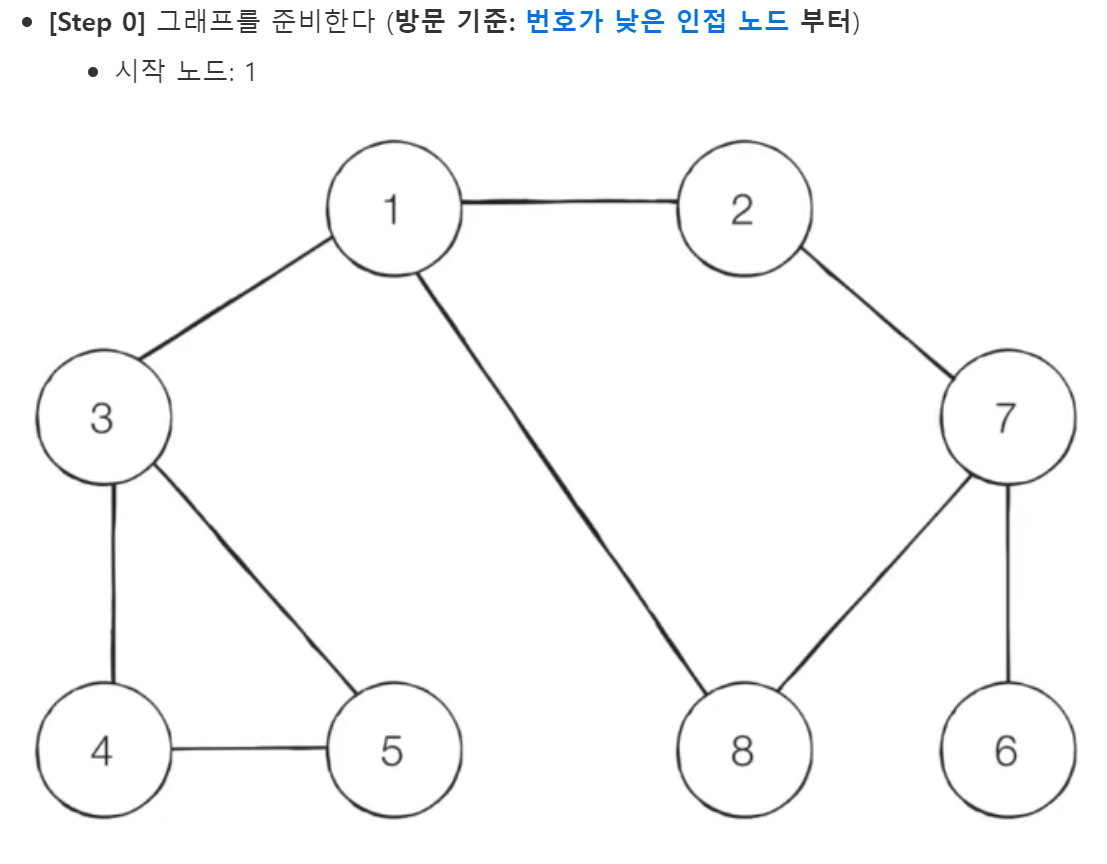

-  DFS 소크 코드 예제

In [1]:
# DFS 함수 정의
def dfs(graph, v, visited):
    # 현재 노드를 방문 처리
    visited[v] = True
    print(v,end=' ')
    # 현재 노드와 연결된 다른 노드를 재귀적으로 방문
    for i in graph[v]: # graph[v]는 v와 연결된 노드들의 리스트
        if not visited[i]: # 방문하지 않은 노드라면
            dfs(graph, i, visited) # 재귀적으로 방문
            
# 각 노드가 연결된 정보를 표현 (2차원 리스트)
graph = [
    [], # 0번 노드는 없으므로 비워둠
    [2,3,8], # 1번 노드와 연결된 노드들
    [1,7], # 2번 노드와 연결된 노드들
    [1,4,5], # 3번 노드와 연결된 노드들
    [3,5], # 4번 노드와 연결된 노드들
    [3,4], # 5번 노드와 연결된 노드들
    [7], # 6번 노드와 연결된 노드들
    [2,6,8], # 7번 노드와 연결된 노드들
    [1,7] # 8번 노드와 연결된 노드들
]

# 각 노드가 방문된 정보를 표현 (1차원 리스트)
visited = [False] * 9 # 0번 노드는 없으므로 9개의 노드만

# 정의된 DFS 함수 호출
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

#### 문제-연결 요소의 개수 구하기

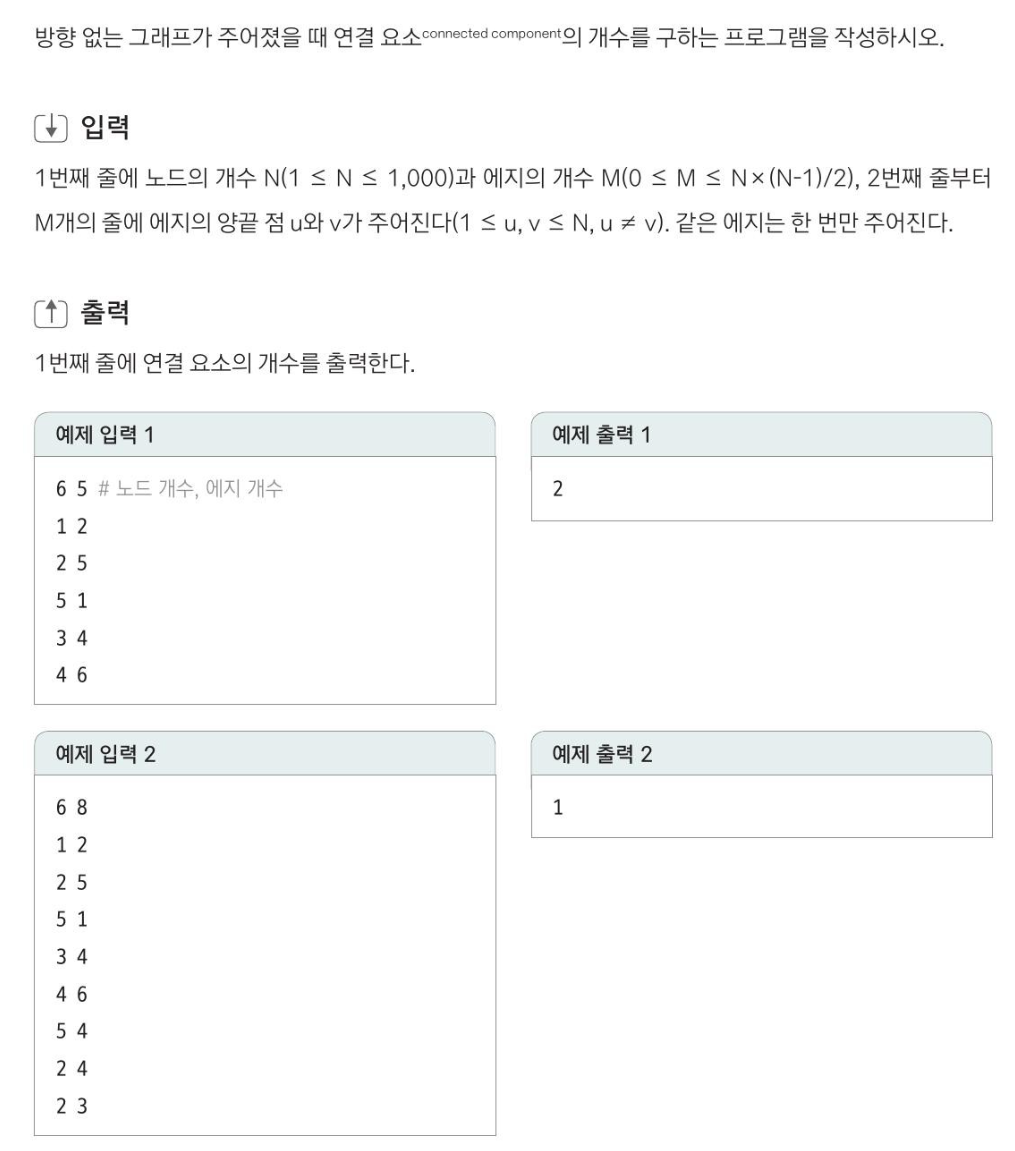

##### 문제 분석 및 풀이
- 노드의 최대 개수가 1,000이므로 시간 복잡도 N2 이하의 알고리즘을 모두 사용할 수 있다.
- 연결 요소는 에지로 연결된 노드의 집합이며, 한 번의 DFS가 끝날 때까지 탐색한 모든 노드의 집합을 하나의 연결 요소로 판단할 수 있다.

1. 그래프를 인접 리스트로 저장하고 방문 리스트도 초기화
- 방향이 없는 그래프이기 때문에 양쪽 방향으로 에지를 모두 저장

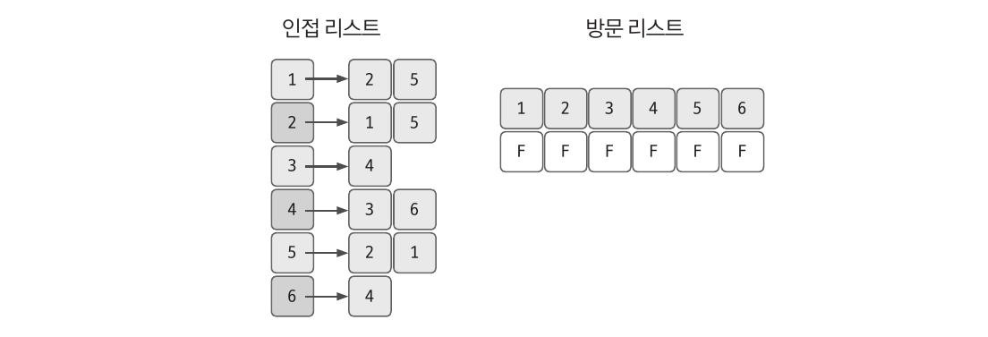

2. 임의의 시작점에서 DFS를 수행
- 현재의 경우 1을 시작점으로 정함. 
- 탐색을 마친 이후 방문한 곳은 1, 2, 5가 됨

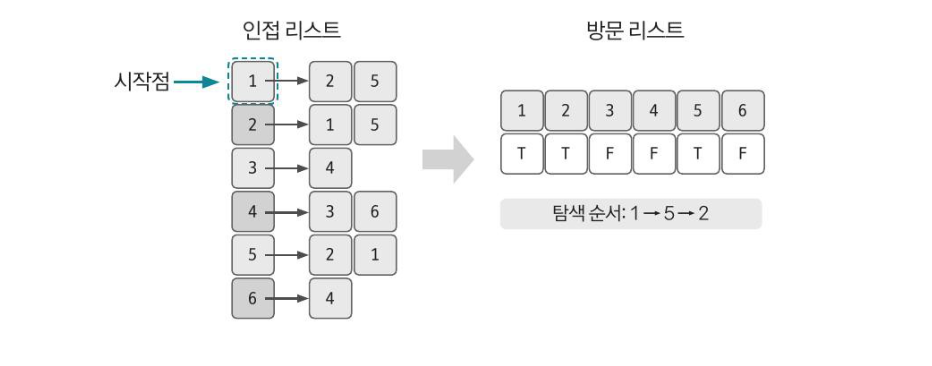

3. 아직 방문하지 않은 노드가 있으므로 시작점을 다시 정해 탐색을 진행
- 현재의 경우 3, 4, 6 순서로 탐색을 맞침. 
- 모든 노드를 방문했으니 전체 탐색을 종료.

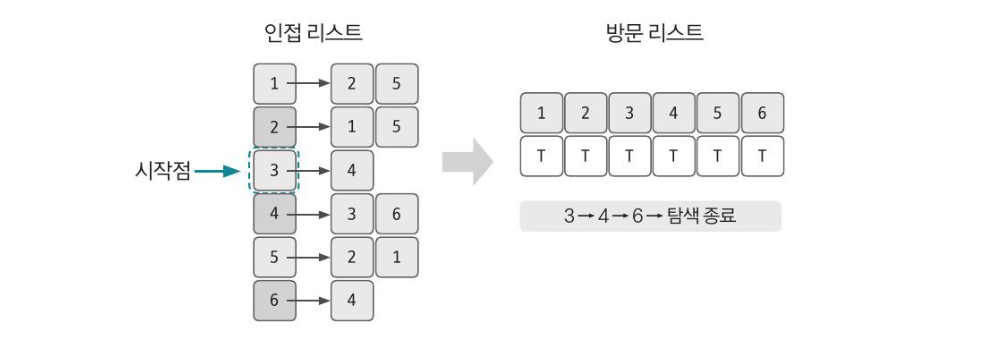

4. 1~3 과정을 통해 총 2번의 DFS가 진행되었다는 것을 알 수 있음. 
- 즉, 연결 요소 개수는 2개.
- 모든 노드를 탐색하는 데 실행한 DFS의 실행 횟수가 곧 연결 요소 개수와 같다.

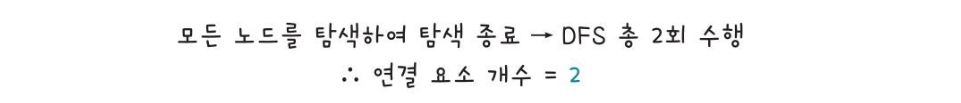

In [2]:
# DFS로 코드 구현

# DFS 함수 정의
def dfs(v):
    visited[v] = True
    for i in graph[v]:
        if not visited[i]:
            dfs(i)
            
# 노드의 개수와 간선의 개수를 입력 받기
n, m = map(int, input().split())

# 각 노드가 연결된 정보를 리스트 자료형으로 표현(2차원 리스트)
graph = [[] for _ in range(n+1)]
visited = [False] * (n+1)

# 모든 간선 정보를 입력 받기
for _ in range(m):
    a, b = map(int, input().split())
    # 양방향 그래프이므로 양쪽에 모두 추가
    graph[a].append(b)
    graph[b].append(a)
    
cnt = 0
for i in range(1, n+1):
    if not visited[i]:
        dfs(i)
        cnt += 1
        
print(cnt)

2


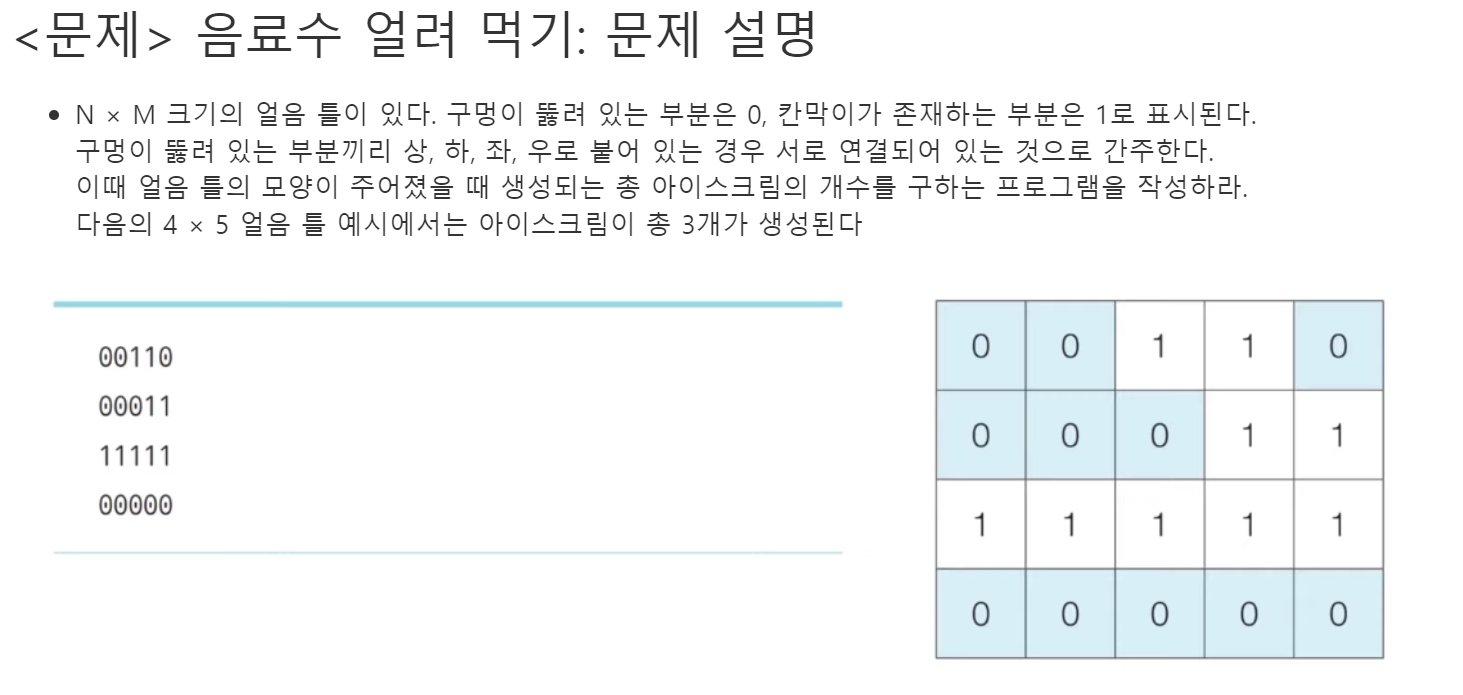

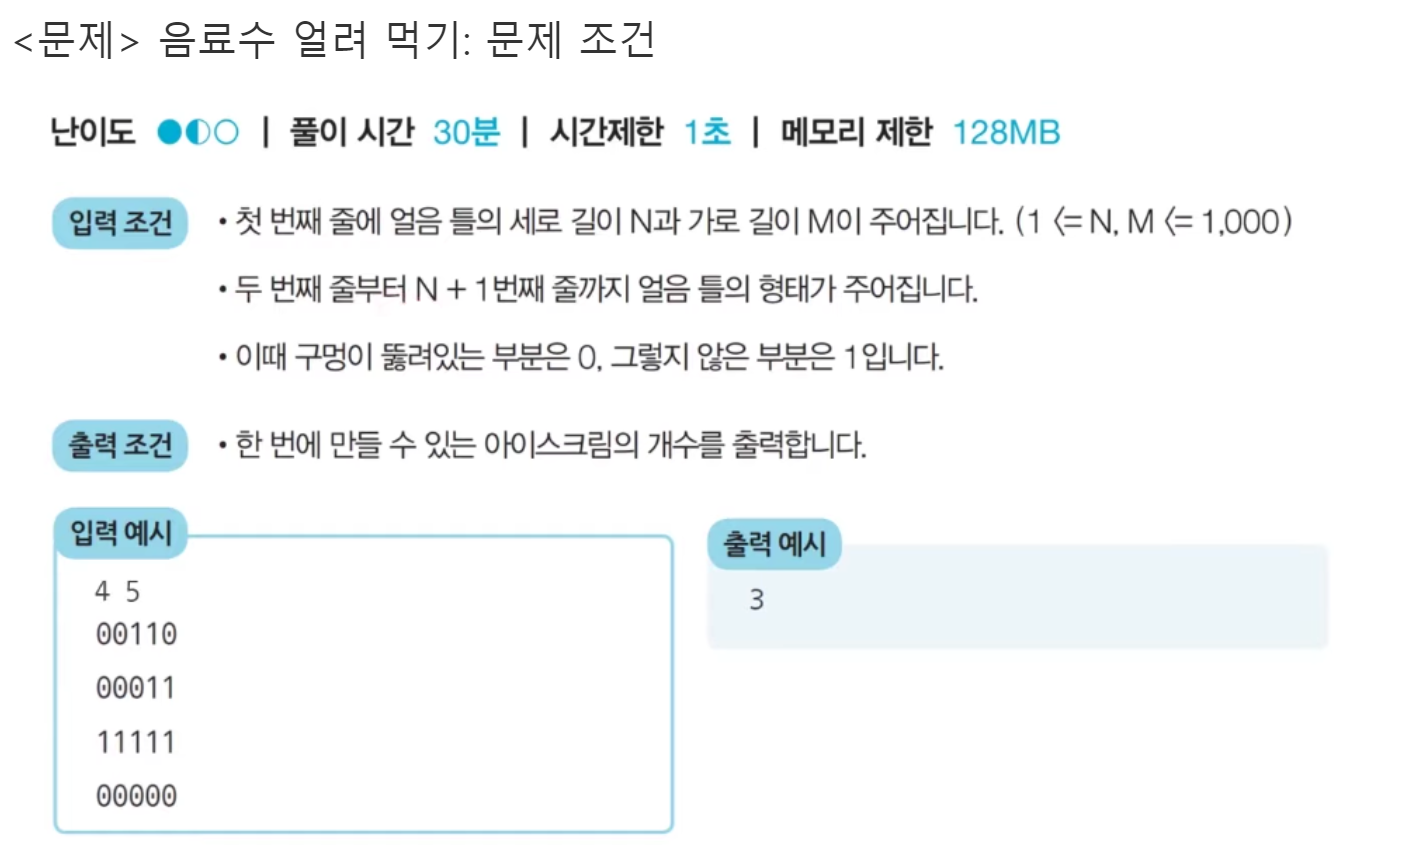

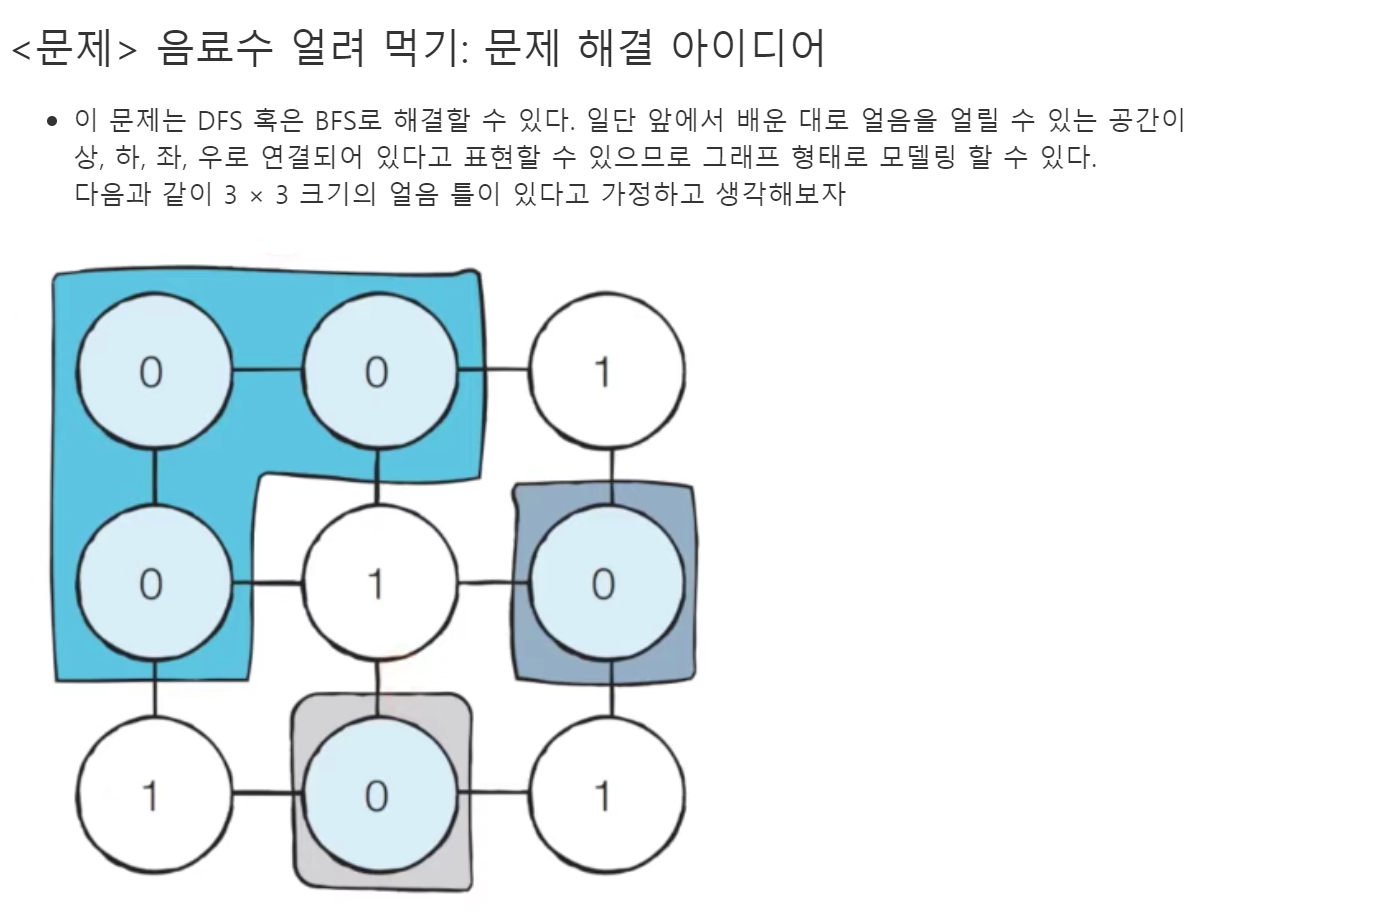

##### [DFS를 이용한 알고리즘]
- 특정한 지점의 주변 상, 하, 좌, 우를 살펴본 뒤에 주변 지점 중에서 '0'이면서 아직 방문하지 않은 지점이 있다면 해당 지점을 방문한다
- 방문한 지점에서 다시 상, 하, 좌, 우를 살펴보면서 방문을 진행하는 과정을 반복하면, 연결된 모든 지점을 방문할 수 있다
- 모든 노드에 대하여 1 ~ 2번의 과정을 반복하며, 방문하지 않은 지점의 수를 카운트한다

In [9]:
# N, M을 공백을 기준으로 구분하여 입력 받기
N, M = map(int, input().split())

# 2차원 리스트의 맵 정보 입력 받기
graph = []
for i in range(N):
    graph.append(list(map(int, input())))
    
# DFS로 특정한 노드를 방문한 뒤에 연결된 모든 노드들도 방문
def dfs(h, w):
    # 주어진 범위를 벗어나는 경우에는 즉시 종료
    # print(h, w)
    if h <=-1 or h >= N or w <= -1 or w >= M:
        # print("범위 벗어남: ", h, w)
        return False
        
    # 현재 노드를 아직 방문하지 않았다면
    if graph[h][w] == 0:
        # 해당 노드 방문 처리
        graph[h][w] = 1
    
        # 상, 하, 좌, 우의 위치들도 모두 재귀적으로 호출
        dfs(h-1, w)  # 상
        dfs(h+1, w)  # 하
        dfs(h, w-1)  # 좌
        dfs(h, w+1)  # 우
        return True  
    return False

# 모든 노드(위치)에 대하여 음료수 채우기
result = 0
for h in range(N):
    for w in range(M):
        # 현재 위치에서 DFS 수행
        # print("start: ", h, w)
        if dfs(h, w) == True:
            result += 1

print(result) # 정답 출력

start:  0 0
범위 벗어남:  -1 0
범위 벗어남:  1 -1
범위 벗어남:  -1 1
범위 벗어남:  0 -1
start:  0 1
start:  0 2
start:  0 3
start:  0 4
범위 벗어남:  -1 4
범위 벗어남:  0 5
start:  1 0
start:  1 1
start:  1 2
start:  1 3
start:  1 4
start:  2 0
start:  2 1
start:  2 2
start:  2 3
start:  2 4
start:  3 0
범위 벗어남:  4 0
범위 벗어남:  3 -1
범위 벗어남:  4 1
범위 벗어남:  4 2
범위 벗어남:  4 3
범위 벗어남:  4 4
범위 벗어남:  3 5
start:  3 1
start:  3 2
start:  3 3
start:  3 4
3
